In [1]:
import pandas as pd

In [2]:
t_df=pd.read_csv('GUIDE_Train.csv')
t_df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
t_df = t_df.astype({col: 'int32' for col in t_df.select_dtypes('int64').columns})

In [4]:
t_df.drop_duplicates(inplace = True)

In [5]:
t_df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5459368
IncidentGrade           51322
ActionGrouped         9438232
ActionGranular        9438232
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9397469
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9420765
FileName                    0
FolderPath

In [6]:
(t_df.isnull().sum()/(len(t_df)))*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.501666
IncidentGrade          0.540557
ActionGrouped         99.409687
ActionGranular        99.409687
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.980344
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [7]:
threshold= len(t_df)* 0.5   # removing 50% above null value
t_df=t_df.dropna(thresh=threshold,axis=1)

In [8]:
t_df=t_df.dropna(subset=['IncidentGrade'])

In [9]:
t_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [10]:
t_df.shape

(9442956, 35)

In [11]:
t_df['Timestamp']=pd.to_datetime(t_df['Timestamp'])
t_df["Day"]=t_df["Timestamp"].dt.day
t_df["Month"]=t_df["Timestamp"].dt.month
t_df["Year"]=t_df["Timestamp"].dt.year
t_df["Hour"]=t_df["Timestamp"].dt.hour
t_df["Time"]=t_df["Timestamp"].dt.time

In [12]:
t_df.drop('Timestamp',axis=1,inplace=True)

In [13]:
t_df[['AlertTitle','Url','AccountName','DeviceName','RegistryValueName', 'ApplicationName','FileName','ResourceIdName','OSVersion','CountryCode', 'State', 'City','Day', 'Month', 'Year', 'Hour']]=t_df[['AlertTitle','Url','AccountName','DeviceName','RegistryValueName', 'ApplicationName','FileName','ResourceIdName','OSVersion','CountryCode', 'State', 'City','Day', 'Month', 'Year', 'Hour']].astype(str)

In [14]:
import numpy as np
cat_cols=t_df.select_dtypes(include=['object']).columns
num_cols = t_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'Url', 'AccountName', 'DeviceName', 'RegistryValueName',
       'ApplicationName', 'FileName', 'ResourceIdName', 'OSVersion',
       'CountryCode', 'State', 'City', 'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')
Numerical Variables:
['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 'IpAddress', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'NetworkMessageId', 'RegistryKey', 'RegistryValueData', 'ApplicationId', 'OAuthApplicationId', 'FolderPath', 'OSFamily']


In [14]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
t_df['IncidentGrade']=l.fit_transform(t_df['IncidentGrade'])

In [15]:

X=t_df[[ 'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 'IpAddress', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'NetworkMessageId', 'RegistryKey', 'RegistryValueData', 'ApplicationId', 'OAuthApplicationId', 'FolderPath', 'OSFamily']]
y=t_df['IncidentGrade']



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

AlertId               0.950489
IncidentId            0.869482
OrgId                 0.832233
DetectorId            0.528094
AccountUpn            0.480226
AccountSid            0.444136
AccountObjectId       0.414008
Id                    0.390202
NetworkMessageId      0.346684
IpAddress             0.341138
FolderPath            0.332190
DeviceId              0.321176
RegistryKey           0.305640
ApplicationId         0.303265
OSFamily              0.301165
RegistryValueData     0.299435
Sha256                0.259149
OAuthApplicationId    0.239484
dtype: float64

In [17]:
from sklearn.preprocessing import OneHotEncoder
#To identify top  categories
top_n = 3
category_counts = t_df['AlertTitle'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others 
t_df.loc[:, 'AlertTitle'] = t_df['AlertTitle'].apply(lambda x: str(x) if x in top_categories else 'Other')

#one hot encoding
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['AlertTitle']])

# Convert the encoded columns into a DataFrame
Alert_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['AlertTitle'])).astype('float32')

print(Alert_df)

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\3957639832.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Other' 'Other' 'Other' ... 'Other' 'Other' 'Other']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'AlertTitle'] = t_df['AlertTitle'].apply(lambda x: str(x) if x in top_categories else 'Other')


         AlertTitle_0  AlertTitle_1  AlertTitle_2  AlertTitle_Other
0                 0.0           0.0           0.0               1.0
1                 0.0           0.0           0.0               1.0
2                 0.0           0.0           0.0               1.0
3                 0.0           0.0           1.0               0.0
4                 0.0           0.0           0.0               1.0
...               ...           ...           ...               ...
9442951           0.0           0.0           0.0               1.0
9442952           0.0           0.0           1.0               0.0
9442953           0.0           0.0           0.0               1.0
9442954           0.0           0.0           0.0               1.0
9442955           0.0           0.0           0.0               1.0

[9442956 rows x 4 columns]


In [18]:
from sklearn.preprocessing import OneHotEncoder
#To identify top  categories
top_n = 3
category_counts = t_df['Category'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others 
t_df.loc[:, 'Category'] = t_df['Category'].apply(lambda x: str(x) if x in top_categories else 'Other')

#one hot encoding
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['Category']])

# Convert the encoded columns into a DataFrame
Category_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['Category'])).astype('float32')

print(Category_df)

         Category_Exfiltration  Category_InitialAccess  Category_Other  \
0                          0.0                     1.0             0.0   
1                          1.0                     0.0             0.0   
2                          0.0                     1.0             0.0   
3                          0.0                     0.0             1.0   
4                          0.0                     0.0             1.0   
...                        ...                     ...             ...   
9442951                    0.0                     1.0             0.0   
9442952                    0.0                     0.0             1.0   
9442953                    1.0                     0.0             0.0   
9442954                    0.0                     0.0             1.0   
9442955                    1.0                     0.0             0.0   

         Category_SuspiciousActivity  
0                                0.0  
1                                

In [19]:
#To identify top  categories
top_n = 3
category_counts = t_df['EntityType'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:,'EntityType'] = t_df['EntityType'].apply(lambda x: str(x) if x in top_categories else 'Other')

#one hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['EntityType']])

# Convert the encoded columns into a DataFrame
EntityType_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['EntityType'])).astype('float32')

print(EntityType_df)

         EntityType_Ip  EntityType_MailMessage  EntityType_Other  \
0                  1.0                     0.0               0.0   
1                  0.0                     0.0               0.0   
2                  0.0                     0.0               1.0   
3                  0.0                     0.0               1.0   
4                  0.0                     0.0               0.0   
...                ...                     ...               ...   
9442951            0.0                     0.0               1.0   
9442952            0.0                     0.0               1.0   
9442953            0.0                     1.0               0.0   
9442954            1.0                     0.0               0.0   
9442955            0.0                     1.0               0.0   

         EntityType_User  
0                    0.0  
1                    1.0  
2                    0.0  
3                    0.0  
4                    1.0  
...                  

In [20]:
#To identify top  categories
top_n = 3
category_counts = t_df['DeviceName'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'DeviceName'] = t_df['DeviceName'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['DeviceName']])

# Convert the encoded columns into a DataFrame
DeviceName_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['DeviceName'])).astype('float32')

print(DeviceName_df)

#To identify top  categories
top_n = 3
category_counts = t_df['FileName'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'FileName'] = t_df['FileName'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['FileName']])

# Convert the encoded columns into a DataFrame
FileName_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['FileName'])).astype('float32')

print(FileName_df)

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\377166010.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['153085' '153085' '153085' ... '153085' '153085' '153085']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'DeviceName'] = t_df['DeviceName'].apply(lambda x:str(x) if x in top_categories else 'Other')


         DeviceName_0  DeviceName_1  DeviceName_153085  DeviceName_Other
0                 0.0           0.0                1.0               0.0
1                 0.0           0.0                1.0               0.0
2                 0.0           0.0                1.0               0.0
3                 0.0           0.0                1.0               0.0
4                 0.0           0.0                1.0               0.0
...               ...           ...                ...               ...
9442951           0.0           0.0                1.0               0.0
9442952           0.0           0.0                1.0               0.0
9442953           0.0           0.0                1.0               0.0
9442954           0.0           0.0                1.0               0.0
9442955           0.0           0.0                1.0               0.0

[9442956 rows x 4 columns]


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\377166010.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['289573' '289573' '289573' ... '289573' '289573' '289573']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'FileName'] = t_df['FileName'].apply(lambda x:str(x) if x in top_categories else 'Other')


         FileName_0  FileName_1  FileName_289573  FileName_Other
0               0.0         0.0              1.0             0.0
1               0.0         0.0              1.0             0.0
2               0.0         0.0              1.0             0.0
3               0.0         0.0              1.0             0.0
4               0.0         0.0              1.0             0.0
...             ...         ...              ...             ...
9442951         0.0         0.0              1.0             0.0
9442952         0.0         0.0              1.0             0.0
9442953         0.0         0.0              1.0             0.0
9442954         0.0         0.0              1.0             0.0
9442955         0.0         0.0              1.0             0.0

[9442956 rows x 4 columns]


In [21]:
top_n = 3
category_counts = t_df['Url'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'Url'] = t_df['Url'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['Url']])

# Convert the encoded columns into a DataFrame
Url_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['Url'])).astype('float32')

print(Url_df)

#To identify top  categories
top_n = 3
category_counts = t_df['RegistryValueName'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'RegistryValueName'] = t_df['RegistryValueName'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['RegistryValueName']])

# Convert the encoded columns into a DataFrame
RegistryvalueName_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['RegistryValueName'])).astype('float32')

print(RegistryvalueName_df)

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\44504517.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['160396' '160396' 'Other' ... '160396' '160396' '160396']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'Url'] = t_df['Url'].apply(lambda x:str(x) if x in top_categories else 'Other')


         Url_0  Url_1  Url_160396  Url_Other
0          0.0    0.0         1.0        0.0
1          0.0    0.0         1.0        0.0
2          0.0    0.0         0.0        1.0
3          0.0    0.0         0.0        1.0
4          0.0    0.0         1.0        0.0
...        ...    ...         ...        ...
9442951    0.0    0.0         1.0        0.0
9442952    0.0    0.0         0.0        1.0
9442953    0.0    0.0         1.0        0.0
9442954    0.0    0.0         1.0        0.0
9442955    0.0    0.0         1.0        0.0

[9442956 rows x 4 columns]


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\44504517.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['635' '635' '635' ... '635' '635' '635']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'RegistryValueName'] = t_df['RegistryValueName'].apply(lambda x:str(x) if x in top_categories else 'Other')


         RegistryValueName_0  RegistryValueName_1  RegistryValueName_635  \
0                        0.0                  0.0                    1.0   
1                        0.0                  0.0                    1.0   
2                        0.0                  0.0                    1.0   
3                        0.0                  0.0                    1.0   
4                        0.0                  0.0                    1.0   
...                      ...                  ...                    ...   
9442951                  0.0                  0.0                    1.0   
9442952                  0.0                  0.0                    1.0   
9442953                  0.0                  0.0                    1.0   
9442954                  0.0                  0.0                    1.0   
9442955                  0.0                  0.0                    1.0   

         RegistryValueName_Other  
0                            0.0  
1                

In [22]:
top_n = 3
category_counts = t_df['AccountName'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'AccountName'] = t_df['AccountName'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['AccountName']])

# Convert the encoded columns into a DataFrame
AccountName_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['AccountName'])).astype('float32')

print(AccountName_df)

#To identify top  categories
top_n = 3
category_counts = t_df['ApplicationName'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'ApplicationName'] = t_df['ApplicationName'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['ApplicationName']])

# Convert the encoded columns into a DataFrame
ApplicationName_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['ApplicationName'])).astype('float32')

print(ApplicationName_df)

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\52556332.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['453297' 'Other' '453297' ... '453297' '453297' '453297']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'AccountName'] = t_df['AccountName'].apply(lambda x:str(x) if x in top_categories else 'Other')


         AccountName_0  AccountName_1  AccountName_453297  AccountName_Other
0                  0.0            0.0                 1.0                0.0
1                  0.0            0.0                 0.0                1.0
2                  0.0            0.0                 1.0                0.0
3                  0.0            0.0                 1.0                0.0
4                  0.0            0.0                 0.0                1.0
...                ...            ...                 ...                ...
9442951            0.0            0.0                 1.0                0.0
9442952            0.0            0.0                 1.0                0.0
9442953            0.0            0.0                 1.0                0.0
9442954            0.0            0.0                 1.0                0.0
9442955            0.0            0.0                 1.0                0.0

[9442956 rows x 4 columns]


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\52556332.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3421' '3421' '3421' ... '3421' '3421' '3421']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'ApplicationName'] = t_df['ApplicationName'].apply(lambda x:str(x) if x in top_categories else 'Other')


         ApplicationName_0  ApplicationName_1  ApplicationName_3421  \
0                      0.0                0.0                   1.0   
1                      0.0                0.0                   1.0   
2                      0.0                0.0                   1.0   
3                      0.0                0.0                   1.0   
4                      0.0                0.0                   1.0   
...                    ...                ...                   ...   
9442951                0.0                0.0                   1.0   
9442952                0.0                0.0                   1.0   
9442953                0.0                0.0                   1.0   
9442954                0.0                0.0                   1.0   
9442955                0.0                0.0                   1.0   

         ApplicationName_Other  
0                          0.0  
1                          0.0  
2                          0.0  
3              

In [23]:
top_n = 3
category_counts = t_df['ResourceIdName'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'ResourceIdName'] = t_df['ResourceIdName'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['ResourceIdName']])

# Convert the encoded columns into a DataFrame
ResourceIdName_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['ResourceIdName'])).astype('float32')

print(ResourceIdName_df)

#To identify top  categories
top_n = 3
category_counts = t_df['OSVersion'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'OSVersion'] = t_df['OSVersion'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['OSVersion']])

# Convert the encoded columns into a DataFrame
OSVersion_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['OSVersion'])).astype('float32')

print(OSVersion_df)

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\1537208855.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3586' '3586' '3586' ... '3586' '3586' '3586']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'ResourceIdName'] = t_df['ResourceIdName'].apply(lambda x:str(x) if x in top_categories else 'Other')


         ResourceIdName_0  ResourceIdName_1  ResourceIdName_3586  \
0                     0.0               0.0                  1.0   
1                     0.0               0.0                  1.0   
2                     0.0               0.0                  1.0   
3                     0.0               0.0                  1.0   
4                     0.0               0.0                  1.0   
...                   ...               ...                  ...   
9442951               0.0               0.0                  1.0   
9442952               0.0               0.0                  1.0   
9442953               0.0               0.0                  1.0   
9442954               0.0               0.0                  1.0   
9442955               0.0               0.0                  1.0   

         ResourceIdName_Other  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                      

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\1537208855.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['66' '66' '66' ... '66' '66' '66']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'OSVersion'] = t_df['OSVersion'].apply(lambda x:str(x) if x in top_categories else 'Other')


         OSVersion_0  OSVersion_2  OSVersion_66  OSVersion_Other
0                0.0          0.0           1.0              0.0
1                0.0          0.0           1.0              0.0
2                0.0          0.0           1.0              0.0
3                0.0          0.0           1.0              0.0
4                0.0          0.0           1.0              0.0
...              ...          ...           ...              ...
9442951          0.0          0.0           1.0              0.0
9442952          0.0          0.0           1.0              0.0
9442953          0.0          0.0           1.0              0.0
9442954          0.0          0.0           1.0              0.0
9442955          0.0          0.0           1.0              0.0

[9442956 rows x 4 columns]


In [24]:
top_n = 3
category_counts = t_df['CountryCode'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'CountryCode'] = t_df['CountryCode'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['CountryCode']])

# Convert the encoded columns into a DataFrame
CountryCode_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['CountryCode'])).astype('float32')

print(CountryCode_df)

#To identify top  categories
top_n = 3
category_counts = t_df['State'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'State'] = t_df['State'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['State']])

# Convert the encoded columns into a DataFrame
State_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['State'])).astype('float32')

print(State_df)

#To identify top  categories
top_n = 3
category_counts = t_df['City'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'City'] = t_df['City'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['City']])

# Convert the encoded columns into a DataFrame
City_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['City'])).astype('float32')

print(City_df)

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\2056883222.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Other' '242' '242' ... '242' '242' '242']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'CountryCode'] = t_df['CountryCode'].apply(lambda x:str(x) if x in top_categories else 'Other')


         CountryCode_0  CountryCode_1  CountryCode_242  CountryCode_Other
0                  0.0            0.0              0.0                1.0
1                  0.0            0.0              1.0                0.0
2                  0.0            0.0              1.0                0.0
3                  0.0            0.0              1.0                0.0
4                  0.0            0.0              1.0                0.0
...                ...            ...              ...                ...
9442951            0.0            0.0              1.0                0.0
9442952            0.0            0.0              1.0                0.0
9442953            0.0            0.0              1.0                0.0
9442954            0.0            0.0              1.0                0.0
9442955            0.0            0.0              1.0                0.0

[9442956 rows x 4 columns]


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\2056883222.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Other' '1445' '1445' ... '1445' '1445' '1445']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'State'] = t_df['State'].apply(lambda x:str(x) if x in top_categories else 'Other')


         State_0  State_1  State_1445  State_Other
0            0.0      0.0         0.0          1.0
1            0.0      0.0         1.0          0.0
2            0.0      0.0         1.0          0.0
3            0.0      0.0         1.0          0.0
4            0.0      0.0         1.0          0.0
...          ...      ...         ...          ...
9442951      0.0      0.0         1.0          0.0
9442952      0.0      0.0         1.0          0.0
9442953      0.0      0.0         1.0          0.0
9442954      0.0      0.0         1.0          0.0
9442955      0.0      0.0         1.0          0.0

[9442956 rows x 4 columns]


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\2056883222.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Other' '10630' '10630' ... '10630' '10630' '10630']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'City'] = t_df['City'].apply(lambda x:str(x) if x in top_categories else 'Other')


         City_0  City_1  City_10630  City_Other
0           0.0     0.0         0.0         1.0
1           0.0     0.0         1.0         0.0
2           0.0     0.0         1.0         0.0
3           0.0     0.0         1.0         0.0
4           0.0     0.0         1.0         0.0
...         ...     ...         ...         ...
9442951     0.0     0.0         1.0         0.0
9442952     0.0     0.0         1.0         0.0
9442953     0.0     0.0         1.0         0.0
9442954     0.0     0.0         1.0         0.0
9442955     0.0     0.0         1.0         0.0

[9442956 rows x 4 columns]


In [25]:
top_n = 3
category_counts = t_df['Day'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'Day'] = t_df['Day'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['Day']])

# Convert the encoded columns into a DataFrame
Day_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['Day'])).astype('float16')

print(Day_df)

#To identify top  categories
top_n = 3
category_counts = t_df['Hour'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'Hour'] = t_df['Hour'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['Hour']])

# Convert the encoded columns into a DataFrame
Hour_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['Hour'])).astype('float32')

print(Hour_df)


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\4020004413.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' 'Other' 'Other' ... 'Other' 'Other' '3']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'Day'] = t_df['Day'].apply(lambda x:str(x) if x in top_categories else 'Other')
c:\Users\Dharshinee R\Desktop\Microsoft\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


         Day_3  Day_4  Day_5  Day_Other
0          0.0    1.0    0.0        0.0
1          0.0    0.0    0.0        1.0
2          0.0    0.0    0.0        1.0
3          0.0    0.0    0.0        1.0
4          0.0    0.0    0.0        1.0
...        ...    ...    ...        ...
9442951    0.0    0.0    0.0        1.0
9442952    0.0    0.0    0.0        1.0
9442953    0.0    0.0    0.0        1.0
9442954    0.0    0.0    0.0        1.0
9442955    1.0    0.0    0.0        0.0

[9442956 rows x 4 columns]


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\4020004413.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Other' 'Other' 'Other' ... 'Other' 'Other' 'Other']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'Hour'] = t_df['Hour'].apply(lambda x:str(x) if x in top_categories else 'Other')


         Hour_15  Hour_16  Hour_17  Hour_Other
0            0.0      0.0      0.0         1.0
1            0.0      0.0      0.0         1.0
2            0.0      0.0      0.0         1.0
3            0.0      1.0      0.0         0.0
4            0.0      0.0      0.0         1.0
...          ...      ...      ...         ...
9442951      1.0      0.0      0.0         0.0
9442952      0.0      0.0      0.0         1.0
9442953      0.0      0.0      0.0         1.0
9442954      0.0      0.0      0.0         1.0
9442955      0.0      0.0      0.0         1.0

[9442956 rows x 4 columns]


In [26]:
top_n = 3
category_counts = t_df['Month'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'Month'] = t_df['Month'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['Month']])

# Convert the encoded columns into a DataFrame
Month_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['Month'])).astype('float32')

print(Month_df)

#To identify top  categories
top_n = 3
category_counts = t_df['Year'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'Year'] = t_df['Year'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['Year']])

# Convert the encoded columns into a DataFrame
Year_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['Year'])).astype('float32')

print(Year_df)


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\918717877.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['6' '6' '6' ... '6' '5' '6']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'Month'] = t_df['Month'].apply(lambda x:str(x) if x in top_categories else 'Other')


         Month_1  Month_5  Month_6  Month_Other
0            0.0      0.0      1.0          0.0
1            0.0      0.0      1.0          0.0
2            0.0      0.0      1.0          0.0
3            0.0      0.0      1.0          0.0
4            0.0      0.0      1.0          0.0
...          ...      ...      ...          ...
9442951      0.0      0.0      1.0          0.0
9442952      0.0      0.0      1.0          0.0
9442953      0.0      0.0      1.0          0.0
9442954      0.0      1.0      0.0          0.0
9442955      0.0      0.0      1.0          0.0

[9442956 rows x 4 columns]


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_5812\918717877.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2024' '2024' '2024' ... '2024' '2024' '2024']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  t_df.loc[:, 'Year'] = t_df['Year'].apply(lambda x:str(x) if x in top_categories else 'Other')


         Year_2023  Year_2024
0              0.0        1.0
1              0.0        1.0
2              0.0        1.0
3              0.0        1.0
4              0.0        1.0
...            ...        ...
9442951        0.0        1.0
9442952        0.0        1.0
9442953        0.0        1.0
9442954        0.0        1.0
9442955        0.0        1.0

[9442956 rows x 2 columns]


In [27]:
#To identify top  categories
top_n = 3
category_counts = t_df['EvidenceRole'].value_counts()
top_categories = category_counts.head(top_n).index

#grouping other categories into others
t_df.loc[:, 'EvidenceRole'] = t_df['EvidenceRole'].apply(lambda x:str(x) if x in top_categories else 'Other')
#one hot encoding
encoder = OneHotEncoder(drop=None,sparse_output=False)
encoded_incident = encoder.fit_transform(t_df[['EvidenceRole']])

# Convert the encoded columns into a DataFrame
EvidenceRole_df = pd.DataFrame(encoded_incident, columns=encoder.get_feature_names_out(['EvidenceRole'])).astype('float32')

print(EvidenceRole_df)

         EvidenceRole_Impacted  EvidenceRole_Related
0                          0.0                   1.0
1                          1.0                   0.0
2                          0.0                   1.0
3                          0.0                   1.0
4                          1.0                   0.0
...                        ...                   ...
9442951                    0.0                   1.0
9442952                    0.0                   1.0
9442953                    1.0                   0.0
9442954                    0.0                   1.0
9442955                    1.0                   0.0

[9442956 rows x 2 columns]


In [28]:
encode1_df=pd.concat([Alert_df,Category_df,EntityType_df,DeviceName_df,FileName_df,Url_df,RegistryvalueName_df,ResourceIdName_df,AccountName_df],axis=1)

In [33]:
X=encode1_df
y=t_df['IncidentGrade']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


RegistryValueName_635          0.300403
DeviceName_153085              0.290860
FileName_289573                0.289738
Url_160396                     0.285238
ResourceIdName_3586            0.243591
AccountName_453297             0.201149
AlertTitle_Other               0.189007
Category_InitialAccess         0.165122
AlertTitle_0                   0.120204
EntityType_Other               0.113405
Category_Other                 0.090042
Category_Exfiltration          0.088636
EntityType_Ip                  0.076015
AccountName_Other              0.073384
EntityType_User                0.056736
EntityType_MailMessage         0.042554
FileName_Other                 0.028300
AlertTitle_2                   0.024892
Category_SuspiciousActivity    0.021936
DeviceName_Other               0.021569
Url_Other                      0.014178
AlertTitle_1                   0.012631
FileName_1                     0.002187
AccountName_1                  0.001686
FileName_0                     0.001682


In [29]:
encoded_df=pd.concat([ApplicationName_df,OSVersion_df,Day_df,Hour_df,Month_df,Year_df,CountryCode_df,State_df,City_df,EvidenceRole_df],axis=1)

In [37]:
X=encoded_df
y=t_df['IncidentGrade']
y.isnull().sum()

np.int64(0)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

CountryCode_242          0.321987
Year_2024                0.303771
OSVersion_66             0.302086
ApplicationName_3421     0.298862
Month_6                  0.280018
Hour_Other               0.252926
State_1445               0.239822
City_10630               0.239121
Day_Other                0.189516
EvidenceRole_Related     0.135465
EvidenceRole_Impacted    0.112731
CountryCode_Other        0.043380
City_Other               0.042442
State_Other              0.040302
Day_5                    0.017625
Day_4                    0.015908
Month_5                  0.015614
CountryCode_1            0.012219
State_0                  0.012105
City_0                   0.011969
Day_3                    0.010749
CountryCode_0            0.009416
Hour_15                  0.008479
Hour_16                  0.008434
Hour_17                  0.007913
OSVersion_0              0.003904
State_1                  0.002958
City_1                   0.002061
ApplicationName_Other    0.001802
ApplicationNam

AlertId               0.950489
IncidentId            0.869482
OrgId                 0.832233
DetectorId            0.528094
AccountUpn            0.480226
AccountSid            0.444136
AccountObjectId       0.414008
Id                    0.390202
NetworkMessageId      0.346684
IpAddress             0.341138
FolderPath            0.332190
DeviceId              0.321176
RegistryKey           0.305640
ApplicationId         0.303265
OSFamily              0.301165
RegistryValueData     0.299435
Sha256                0.259149
OAuthApplicationId    0.239484

In [30]:
num_df=t_df[['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'NetworkMessageId', 'RegistryKey', 'ApplicationId',  'FolderPath', 'OSFamily']]


In [31]:
df9=t_df['IncidentGrade']
df9.isnull().sum()

np.int64(0)

In [32]:
en_df=encode1_df[['RegistryValueName_635']]

In [33]:
en1_df=encoded_df[['CountryCode_242','Year_2024','OSVersion_66']]

In [34]:
df9=df9.reset_index(drop=True)
num_df=num_df.reset_index(drop=True)
en_df=en_df.reset_index(drop=True)
en1_df=en1_df.reset_index(drop=True)

In [35]:
num_df=num_df.reindex(en_df.index)
num_df=num_df.reindex(en1_df.index)
num_df=num_df.reindex(df9.index)

In [36]:
x_df=pd.concat([num_df,en_df,en1_df,df9], axis=1)
x_df

,Id,OrgId,IncidentId,AlertId,DetectorId,DeviceId,AccountSid,AccountUpn,AccountObjectId,NetworkMessageId,RegistryKey,ApplicationId,FolderPath,OSFamily,RegistryValueName_635,CountryCode_242,Year_2024,OSVersion_66,IncidentGrade
0,1786,0,612,123247,7,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,0.0,1.0,1.0,2
1,1492,88,326,210035,58,98799,22406,23032,22795,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,1
2,2573,809,58352,712507,423,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,1
3,4528,92,32992,774301,2,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
4,3722,148,4359,188041,9,98799,449,592,440,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442951,1806,0,90,496631,7,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,2
9442952,3377,59,196410,748366,2,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
9442953,1330,44,14117,7425,78,98799,441377,270,425863,22919,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
9442954,618,43,644,8973,52,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0


In [37]:
x_df.isnull().sum()

Id                       0
OrgId                    0
IncidentId               0
AlertId                  0
DetectorId               0
DeviceId                 0
AccountSid               0
AccountUpn               0
AccountObjectId          0
NetworkMessageId         0
RegistryKey              0
ApplicationId            0
FolderPath               0
OSFamily                 0
RegistryValueName_635    0
CountryCode_242          0
Year_2024                0
OSVersion_66             0
IncidentGrade            0
dtype: int64

In [39]:
x_df.to_csv('train_process_data.csv')

In [40]:
X=x_df.drop('IncidentGrade',axis=1)
y=x_df['IncidentGrade']

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Accuracy after feature selection: 91.95%
Confusion Matrix (Validation Set):
[[753532  48723  19196]
 [ 15828 381459   9042]
 [ 30600  28598 601614]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93    821451
           1       0.83      0.94      0.88    406329
           2       0.96      0.91      0.93    660812

    accuracy                           0.92   1888592
   macro avg       0.91      0.92      0.91   1888592
weighted avg       0.92      0.92      0.92   1888592



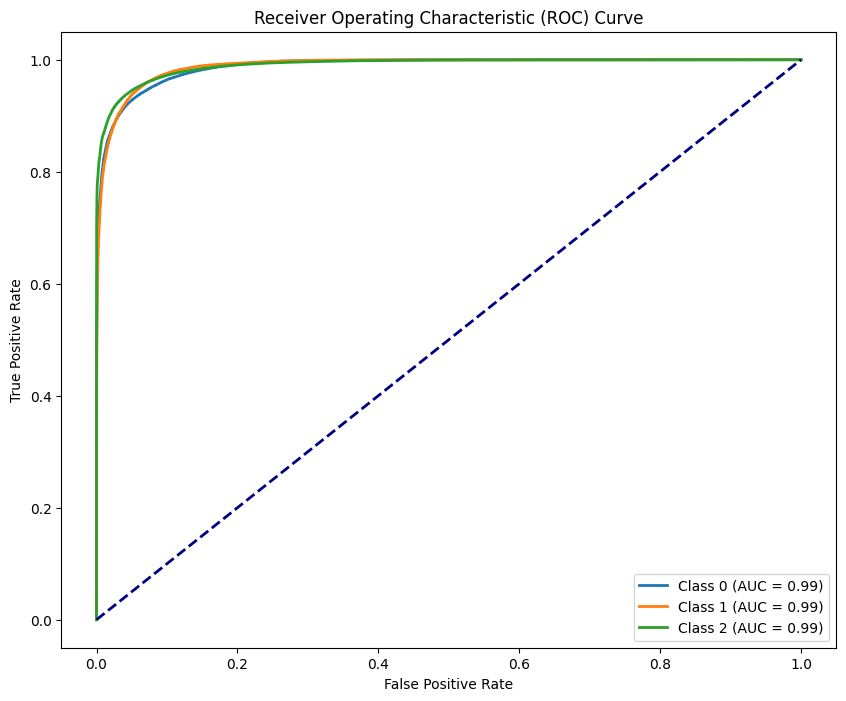

In [52]:
from collections import Counter
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,  eval_metric='mlogloss')
model.fit(X_train, y_train, sample_weight=sample_weights)

# Step 3: Evaluate the model on the validation set
y_val_pred = model.predict(X_val)

# Step 4: Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")



from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

result = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_val, y_val_pred)
print("Classification Report (Validation Set):")
print(result1)
# ROC Curve (for multi-class classification)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_val)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()



In [44]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [45]:
from collections import Counter
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,  eval_metric='mlogloss')
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Step 3: Evaluate the model on the validation set

y_train_pred = model.predict(X_train_scaled)
y_val_pred=model.predict(X_val_scaled)

# Step 4: Evaluate the accuracy of the model
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")



from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

result = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_train, y_train_pred)
print("Classification Report (Validation Set):")
print(result1)




Accuracy after feature selection: 91.97%
Accuracy after feature selection: 91.95%
Confusion Matrix (Validation Set):
[[3017977  194200   77120]
 [  63314 1524174   35747]
 [ 122323  114224 2405285]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93   3289297
           1       0.83      0.94      0.88   1623235
           2       0.96      0.91      0.93   2641832

    accuracy                           0.92   7554364
   macro avg       0.91      0.92      0.91   7554364
weighted avg       0.92      0.92      0.92   7554364



In [46]:
from collections import Counter
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Step 3: Evaluate the model on the validation set

y_train_pred = model.predict(X_train_scaled)
y_val_pred=model.predict(X_val_scaled)

# Step 4: Evaluate the accuracy of the model
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")



from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

result = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_train, y_train_pred)
print("Classification Report (Validation Set):")
print(result1)




Accuracy after feature selection: 100.00%
Accuracy after feature selection: 99.70%
Confusion Matrix (Validation Set):
[[3289297       0       0]
 [      0 1623235       0]
 [      0       0 2641832]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3289297
           1       1.00      1.00      1.00   1623235
           2       1.00      1.00      1.00   2641832

    accuracy                           1.00   7554364
   macro avg       1.00      1.00      1.00   7554364
weighted avg       1.00      1.00      1.00   7554364



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc = {}
for k in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    acc[k] = accuracy_score(y_val, y_pred)
    
# PLotting K v/s accuracy graph
plt.plot(range(3,30,2), acc.values())
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()